### Importación de datos



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de URLs corregidas (según el primer código)
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Cargar todas las tiendas
tiendas = [pd.read_csv(url) for url in urls]

# Asignar nombres individuales
tienda1, tienda2, tienda3, tienda4 = tiendas

# Agregar columna 'Tienda' para identificar cada dataset
for i, df in enumerate(tiendas, 1):
    df['Tienda'] = f'Tienda_{i}'

# Unificar todas las tiendas en un solo DataFrame
df_total = pd.concat(tiendas, ignore_index=True)

# Mostrar las primeras filas para verificar
print(df_total.head())



            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda_1  
1  T

#**1. Análisis de Facturación**
En esta sección se analiza la facturación total y el comportamiento de los ingresos de las tiendas.  
Este análisis permite identificar el monto total generado por las ventas y sirve como base para evaluar la rentabilidad del negocio.


Facturación total de todas las tiendas: 4403619200.0

Estadísticos descriptivos de la facturación:
count    9.435000e+03
mean     4.667323e+05
std      5.903207e+05
min      7.600000e+03
25%      5.520000e+04
50%      2.215000e+05
75%      6.633000e+05
max      2.977000e+06
Name: Facturación, dtype: float64


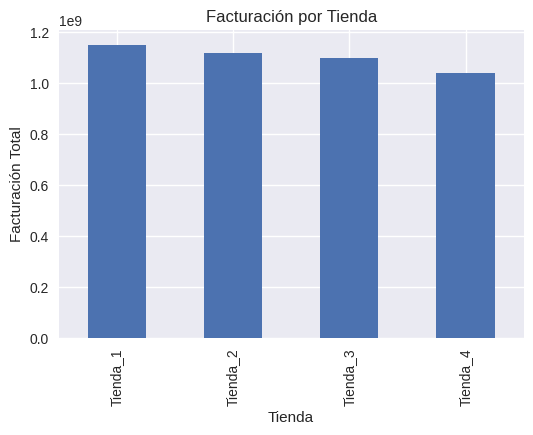

In [19]:
# Calcular facturación total y estadísticos
df_total['Facturación'] = df_total['Precio']

print("Facturación total de todas las tiendas:", df_total['Facturación'].sum())
print("\nEstadísticos descriptivos de la facturación:")
print(df_total['Facturación'].describe())

# Visualización de facturación por tienda
facturacion_tienda = df_total.groupby('Tienda')['Facturación'].sum()
facturacion_tienda.plot(kind='bar', figsize=(6,4), title='Facturación por Tienda', ylabel='Facturación Total', xlabel='Tienda')
plt.show()


# **2. Ventas por categoría**
Aquí se analizan las categorías de productos para identificar cuáles son las más populares.  
Esto permite orientar estrategias comerciales hacia los productos que generan mayor demanda.


Ventas por Categoría:
Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


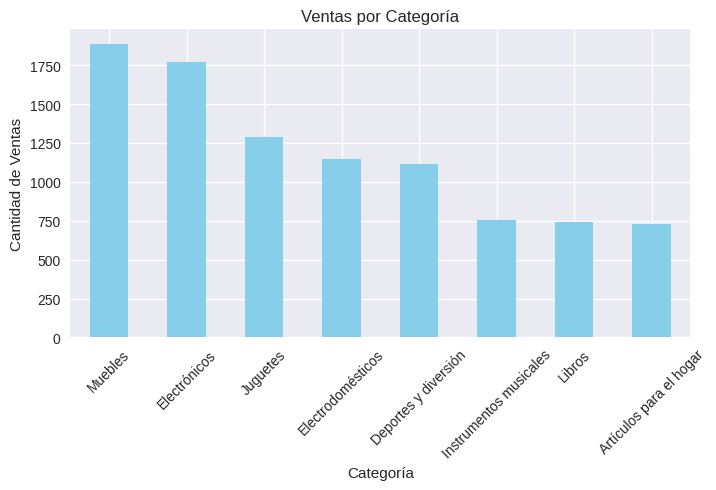

In [20]:
# Contar ventas por categoría
ventas_categoria = df_total['Categoría del Producto'].value_counts()
print("Ventas por Categoría:")
print(ventas_categoria)

# Visualización
plt.figure(figsize=(8,4))
ventas_categoria.plot(kind='bar', color='skyblue')
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.show()


# **3. Calificación promedio de la tienda**
Analizamos las calificaciones otorgadas por los clientes para evaluar la satisfacción general con la tienda.  
Un buen nivel de calificación refleja una experiencia positiva para los usuarios.


Calificación promedio general: 4.014520402755696

Calificación promedio por tienda:
Tienda
Tienda_1    3.976685
Tienda_2    4.037304
Tienda_3    4.048326
Tienda_4    3.995759
Name: Calificación, dtype: float64


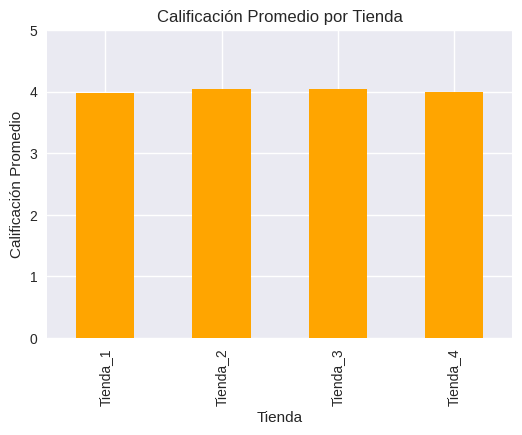

In [21]:
# Calificación promedio general y por tienda
calificacion_promedio = df_total['Calificación'].mean()
print("Calificación promedio general:", calificacion_promedio)

calificacion_tienda = df_total.groupby('Tienda')['Calificación'].mean()
print("\nCalificación promedio por tienda:")
print(calificacion_tienda)

# Visualización
plt.figure(figsize=(6,4))
calificacion_tienda.plot(kind='bar', color='orange')
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0,5)
plt.show()


# **4. Productos más y menos vendidos**
En esta sección se identifican los productos más y menos vendidos.  
Este análisis ayuda a gestionar el inventario y detectar oportunidades de marketing para productos menos populares.


Top 5 productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Name: count, dtype: int64

5 productos menos vendidos:
Producto
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


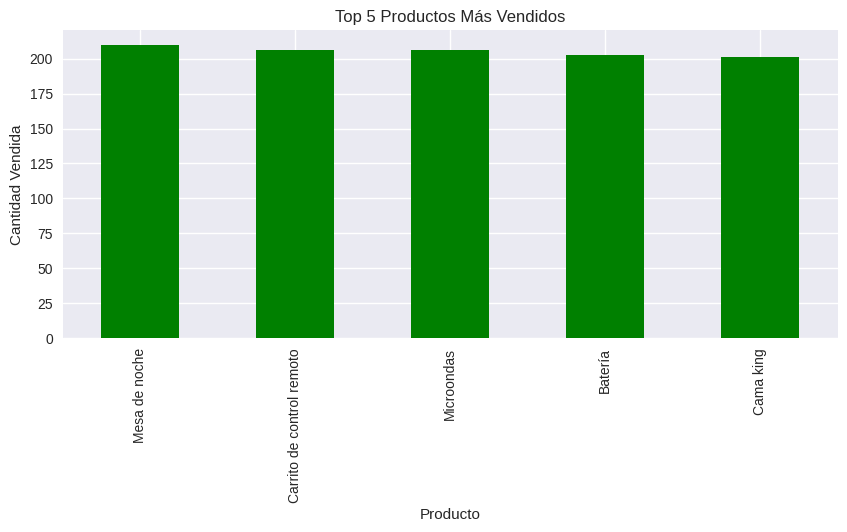

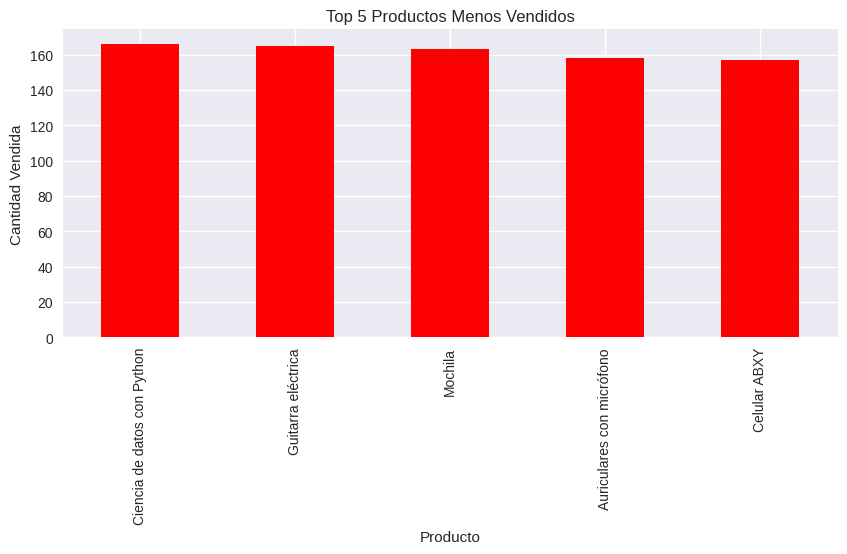

In [22]:
# Top 5 productos más vendidos
top5_productos = df_total['Producto'].value_counts().head()
print("Top 5 productos más vendidos:")
print(top5_productos)

# Bottom 5 productos menos vendidos
bottom5_productos = df_total['Producto'].value_counts().tail()
print("\n5 productos menos vendidos:")
print(bottom5_productos)

# Visualización
plt.figure(figsize=(10,4))
top5_productos.plot(kind='bar', color='green', title='Top 5 Productos Más Vendidos')
plt.ylabel('Cantidad Vendida')
plt.show()

plt.figure(figsize=(10,4))
bottom5_productos.plot(kind='bar', color='red', title='Top 5 Productos Menos Vendidos')
plt.ylabel('Cantidad Vendida')
plt.show()


# **5. Envío promedio por tienda**
En esta sección se analiza el costo promedio de envío por tienda.  
Esto ayuda a evaluar la eficiencia logística y el impacto de los costos de envío en la operación.


Costo de envío promedio por tienda:
Tienda
Tienda_1    26018.609580
Tienda_2    25216.235693
Tienda_3    24805.680373
Tienda_4    23459.457167
Name: Costo de envío, dtype: float64


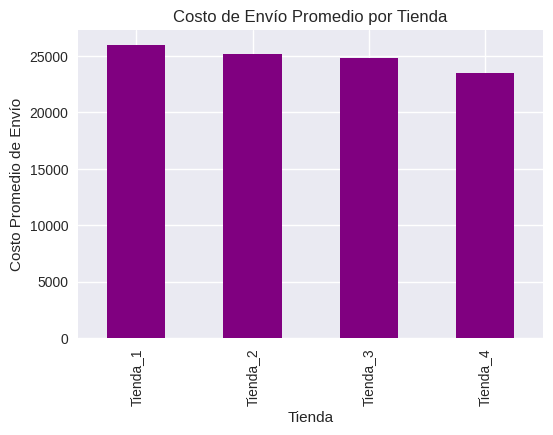

In [23]:
# Calcular costo promedio de envío por tienda
envio_promedio_tienda = df_total.groupby('Tienda')['Costo de envío'].mean()
print("Costo de envío promedio por tienda:")
print(envio_promedio_tienda)

# Visualización
plt.figure(figsize=(6,4))
envio_promedio_tienda.plot(kind='bar', color='purple', title='Costo de Envío Promedio por Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.show()


# **Visualización Final de Resultados**

Después de realizar los análisis de facturación, ventas por categoría, calificación promedio, productos más y menos vendidos y envío promedio por tienda, es fundamental transformar los hallazgos en visualizaciones claras.

El objetivo de estas visualizaciones es:

- Resumir de manera visual los principales indicadores de rendimiento de las 4 tiendas.
- Facilitar la identificación de patrones de ventas, costos y satisfacción de los clientes.
- Brindar un soporte visual para la toma de decisiones estratégicas, como determinar cuál tienda es menos eficiente.

A continuación, se presentan gráficos de distintos tipos (barras, circular y dispersión) que permiten observar:

1. La facturación total por tienda.
2. La distribución de las ventas por categoría de producto.
3. La relación entre el precio de los productos y el costo de envío, diferenciada por tienda.
4. Los productos más vendidos, para identificar cuáles tienen mayor demanda.

Estas visualizaciones servirán de base para emitir una recomendación final al Sr. Juan sobre qué tienda debería vender para iniciar su nuevo emprendimiento.


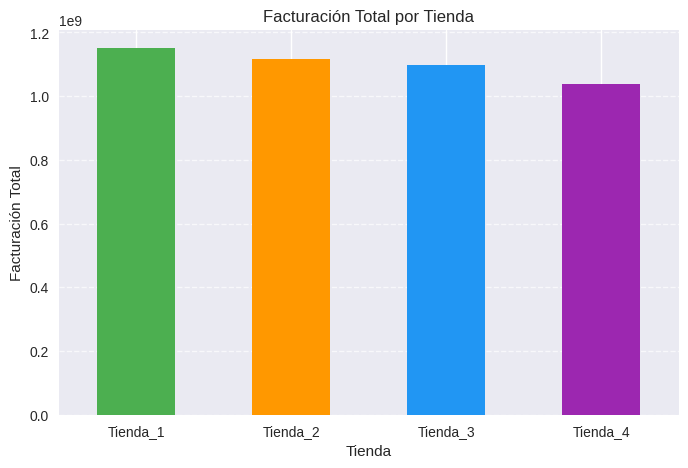

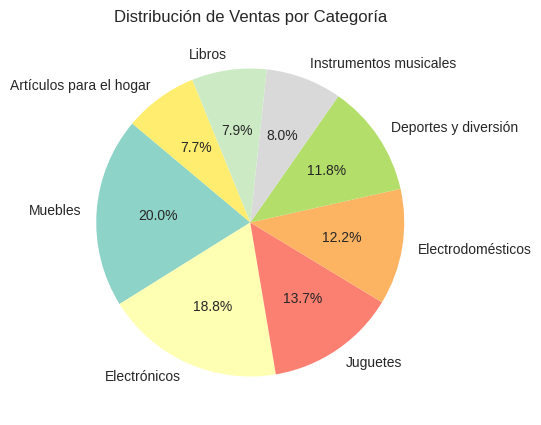

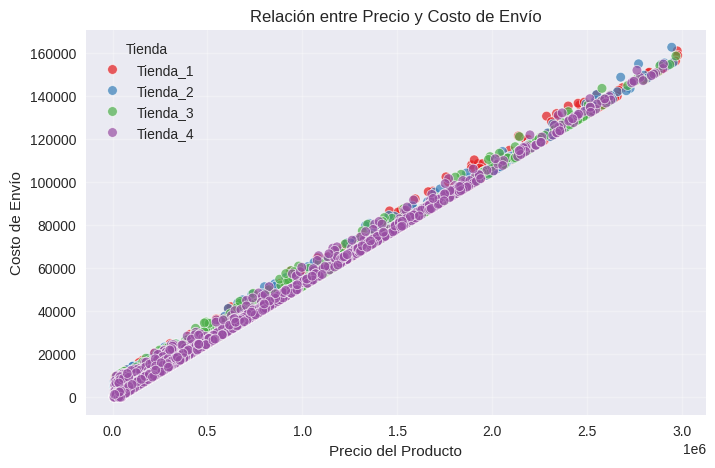

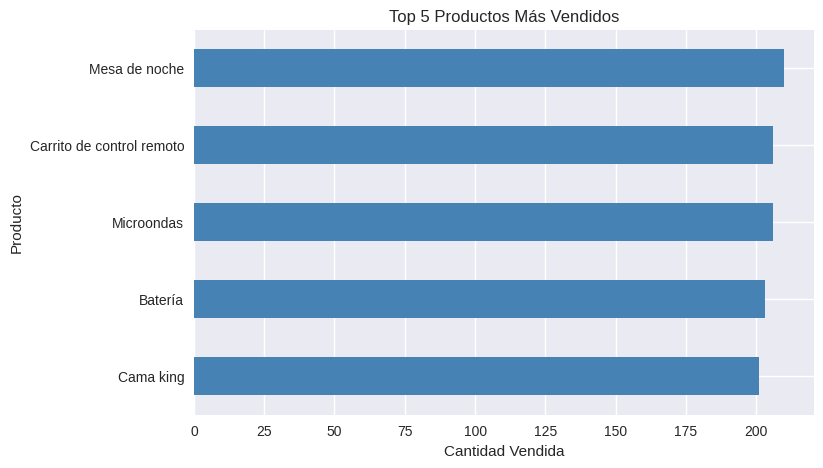

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (8,5)

# ========================
# Gráfico de barras: Facturación por tienda
# ========================
facturacion_tienda = df_total.groupby('Tienda')['Facturación'].sum().sort_values(ascending=False)

plt.figure()
facturacion_tienda.plot(kind='bar', color=['#4CAF50', '#FF9800', '#2196F3', '#9C27B0'])
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# ========================
# Gráfico circular: Distribución de ventas por categoría
# ========================
ventas_categoria = df_total['Categoría del Producto'].value_counts()

plt.figure()
ventas_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Distribución de Ventas por Categoría')
plt.ylabel('')  # Ocultamos el label de eje Y
plt.show()


# ========================
# Gráfico de dispersión: Precio vs Costo de Envío (color por tienda)
# ========================
plt.figure()
sns.scatterplot(
    data=df_total,
    x='Precio',
    y='Costo de envío',
    hue='Tienda',
    alpha=0.7,
    palette='Set1'
)
plt.title('Relación entre Precio y Costo de Envío')
plt.xlabel('Precio del Producto')
plt.ylabel('Costo de Envío')
plt.legend(title='Tienda')
plt.grid(alpha=0.3)
plt.show()


# ========================
# Top 5 productos más vendidos
# ========================
top5_productos = df_total['Producto'].value_counts().head(5)

plt.figure()
top5_productos.plot(kind='barh', color='steelblue')
plt.title('Top 5 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.gca().invert_yaxis()  # Para que el más vendido quede arriba
plt.show()


#**¡Extra! Análisis del Desempeño Geográfico**

En esta sección, exploraremos la distribución geográfica de las ventas utilizando las coordenadas de **latitud** y **longitud**.  

El objetivo de este análisis es:

- Identificar **zonas con mayor concentración de ventas**.
- Explorar si ciertas **tiendas tienen un rendimiento mejor o peor en determinadas regiones**.
- Observar si existen **patrones geográficos** que influyen en los ingresos o calificaciones.

Para este análisis:

1. Se utilizarán gráficos de dispersión para visualizar la ubicación de las ventas.
2. Se colorearán los puntos por **tienda** para distinguir la distribución de cada una.
3. Se generarán **mapas de calor** para ver áreas de mayor densidad de ventas.

> Nota: Este análisis es útil para decisiones de logística y marketing, ya que ayuda a detectar zonas estratégicas para expansión o cierre de tiendas.


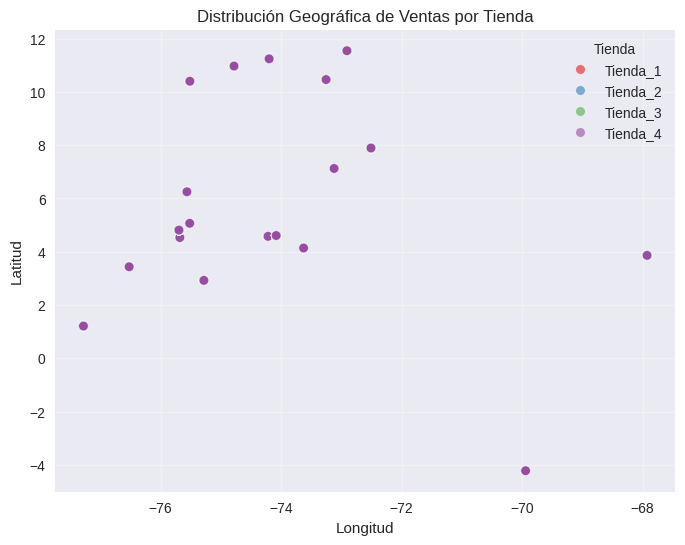

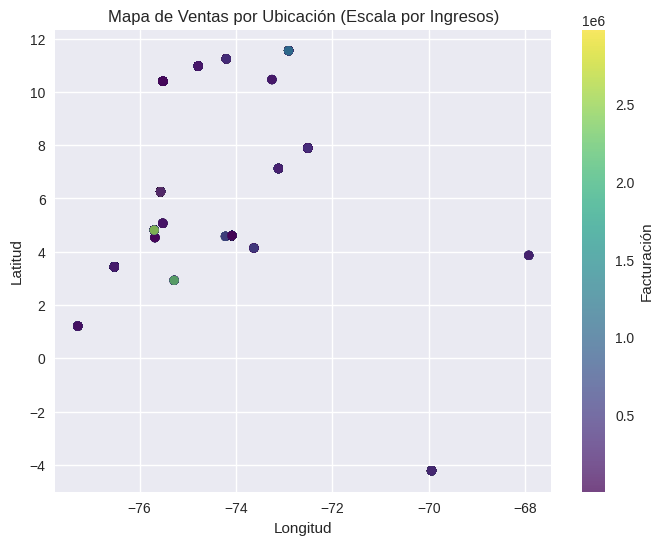

In [25]:
# =========================
# Análisis geográfico de ventas
# =========================

# Comprobar que existen columnas de latitud y longitud
if 'lat' in df_total.columns and 'lon' in df_total.columns:
    plt.figure(figsize=(8,6))

    # Dispersión de ventas por ubicación
    sns.scatterplot(
        data=df_total,
        x='lon',
        y='lat',
        hue='Tienda',
        alpha=0.6,
        palette='Set1'
    )
    plt.title('Distribución Geográfica de Ventas por Tienda')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.grid(alpha=0.3)
    plt.legend(title='Tienda')
    plt.show()

    # Análisis adicional: densidad por ingresos
    plt.figure(figsize=(8,6))
    plt.scatter(df_total['lon'], df_total['lat'],
                c=df_total['Facturación'], cmap='viridis', s=40, alpha=0.7)
    plt.colorbar(label='Facturación')
    plt.title('Mapa de Ventas por Ubicación (Escala por Ingresos)')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.show()

else:
    print("Las columnas 'lat' y 'lon' no están disponibles para el análisis geográfico.")


In [27]:
import plotly.express as px

# =========================
# Verificar datos antes de graficar
# =========================
if 'lat' in df_total.columns and 'lon' in df_total.columns:
    print("Datos por tienda para el mapa:")
    print(df_total['Tienda'].value_counts())

    # Scatter Mapbox interactivo
    fig = px.scatter_mapbox(
        df_total,
        lat='lat',
        lon='lon',
        color='Tienda',           # Color por tienda
        size='Facturación',       # Tamaño proporcional a la facturación
        hover_name='Producto',    # Muestra producto al pasar el mouse
        hover_data={
            'Precio': True,
            'Calificación': True,
            'Tienda': True,
            'lat': False,  # Ocultar lat/lon en hover
            'lon': False
        },
        zoom=5,
        mapbox_style="open-street-map"
    )

    # Personalizar el diseño
    fig.update_layout(
        title='Distribución Geográfica de Ventas por Tienda (Interactivo)',
        legend_title='Tienda',
        margin={"r":0,"t":40,"l":0,"b":0},
        height=600
    )

    fig.show()
else:
    print("No se encontraron columnas 'lat' y 'lon' en df_total.")


Datos por tienda para el mapa:
Tienda
Tienda_1    2359
Tienda_2    2359
Tienda_3    2359
Tienda_4    2358
Name: count, dtype: int64
